In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv('spotify-2023.csv',encoding='latin-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,222,43,13,418,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,89,30,13,194,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,210,48,11,953,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,110,66,13,339,170,D,Minor,81,56,48,21,0,8,33


# Overview of DataSet

#### • How many rows and columns does the dataset contain?
#### • What are the data types of each column? Are there any missing values?

In [56]:
rows, columns = df.shape
print(f"The DataSet has {rows} rows and {columns} columns.")

The DataSet has 953 rows and 24 columns.


In [5]:
data_types = pd.DataFrame(df.dtypes, columns=['Data Type']).reset_index()
data_types.columns = ['Column', 'Data Type']

missing_values = pd.DataFrame(df.isnull().sum(), columns=['Missing Values']).reset_index()
missing_values.columns = ['Column', 'Missing Values']

# Merging data types and missing values
overview_table = pd.merge(data_types, missing_values, on='Column')
display(overview_table)


,Column,Data Type,Missing Values
0,track_name,object,0
1,artist(s)_name,object,0
2,artist_count,int64,0
3,released_year,int64,0
4,released_month,int64,0
5,released_day,int64,0
6,in_spotify_playlists,int64,0
7,in_spotify_charts,int64,0
8,streams,object,0
9,in_apple_playlists,int64,0


 there are some NaN values in columns like in_shazam_charts and key.

# BASIC DESCRIPTIVE STATISTICS

#### • What are the mean, median, and standard deviation of the streams column?
#### • What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

In [48]:
streams = pd.to_numeric(df['streams'], errors='coerce')  # Convert to numeric, replacing errors with NaN
streams_stats_df = pd.DataFrame({
    "Statistic": ["Mean", "Median", "Standard Deviation"],
    "Streams": [streams.mean(), streams.median(), streams.std()]
})

# Display streams statistics as DataFrame with formatted numbers
print("Statistics for Streams:")
display(streams_stats_df.style.format({"Streams": "{:,.2f}"}))

Statistics for Streams:


,Statistic,Streams
0,Mean,"514,137,424.94"
1,Median,"290,530,915.00"
2,Standard Deviation,"566,856,949.04"


In [50]:

# Distribution of released_year
year_dist_df = df['released_year'].value_counts().sort_index().reset_index()
year_dist_df.columns = ["Released Year", "Count"]


# Display year distribution and summary statistics as DataFrames
print("Distribution of Released Year:")
display(year_dist_df)

print("\n")

# Distribution of artist_count
artist_count_dist_df = df['artist_count'].value_counts().sort_index().reset_index()
artist_count_dist_df.columns = ["Artist Count", "Count"]



# Display artist count distribution and summary statistics as DataFrames
print("Distribution of Artist Count:")
display(artist_count_dist_df)


Distribution of Released Year:


,Released Year,Count
0,1930,1
1,1942,1
2,1946,1
3,1950,1
4,1952,1
5,1957,2
6,1958,3
7,1959,2
8,1963,3
9,1968,1




Distribution of Artist Count:


,Artist Count,Count
0,1,587
1,2,254
2,3,85
3,4,15
4,5,5
5,6,3
6,7,2
7,8,2


#### Released Year:

##### - There may be a noticeable increase in releases starting in the 2000s, with a peak in recent years. This could align with the rise of streaming platforms.
##### - there could be a musical trend on a particular year that has an unusual high count.

#### Artist Count:

##### - Most songs have one or two artists, with a smaller percentage involving three or more. In recent years, songs with multiple artists may have increased, showing a trend in collaboration.
##### -  Artist count with 20 or more coud inidicate that there might be collaboration or unique project from the artists.


# TOP PERFORMER

#### • Which track has the highest number of streams? Display the top 5 most streamed tracks.
#### • Who are the top 5 most frequent artists based on the number of tracks in the dataset?


In [11]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Sort the dataframe by streams in descending order and select the top 5 rows
streams5 = df.nlargest(5, 'streams')

# Select and display the desired columns in a formatted DataFrame
streams5_df = streams5[['track_name', 'artist(s)_name', 'streams']].reset_index(drop=True)

# Display the DataFrame
print("Top 5 Tracks by Streams:")
display(streams5_df)

Top 5 Tracks by Streams:


,track_name,artist(s)_name,streams
0,Blinding Lights,The Weeknd,3.703895e+09
1,Shape of You,Ed Sheeran,3.562544e+09
2,Someone You Loved,Lewis Capaldi,2.887242e+09
3,Dance Monkey,Tones and I,2.864792e+09
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09


In [12]:
# Get the top 5 artists by the number of tracks
artists5 = df['artist(s)_name'].value_counts().head(5).reset_index()
artists5.columns = ["Artist(s) Name", "Number of Tracks"]

# Display the DataFrame
print("Top 5 Artists by Number of Tracks:")
display(artists5)


Top 5 Artists by Number of Tracks:


,Artist(s) Name,Number of Tracks
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17


# TEMPORAL TRENDS

#### • Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.
#### • Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

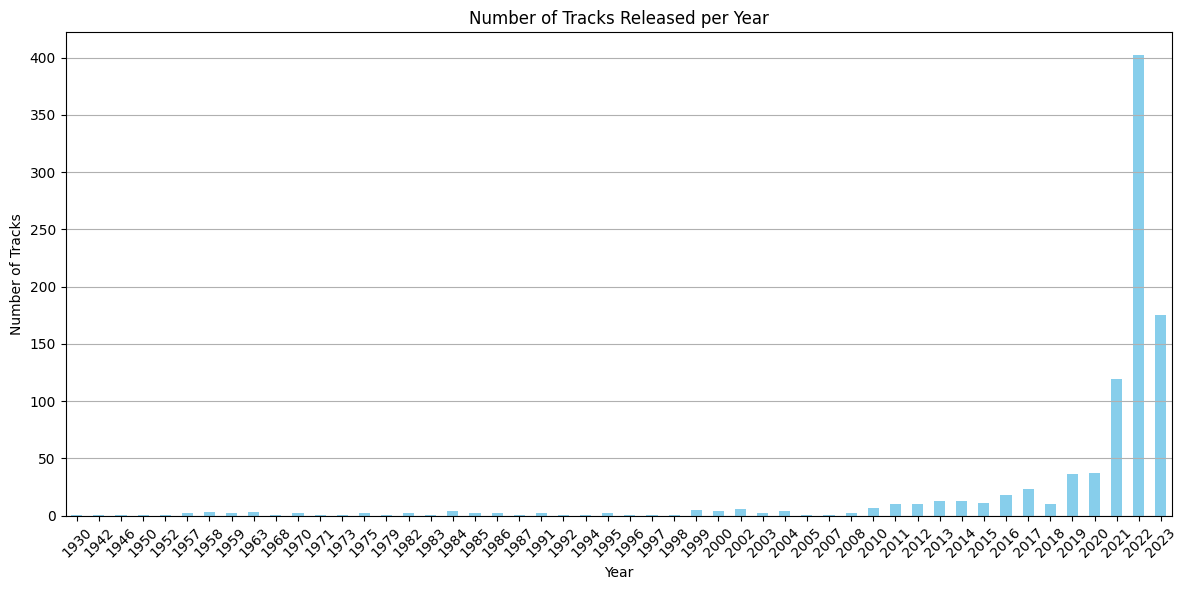

In [14]:
tracks_per_year = df['released_year'].value_counts().sort_index()

# Plotting the number of tracks released per year
plt.figure(figsize=(12, 6))
tracks_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Tracks Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

##### -  There is a steep increase in the number of tracks released starting around the mid-2010s, with a sharp peak around 2020-2021. The highest number of releases appears to be in 2020 and 2021. 
##### -  This spike could be due to various factors, including the pandemic prompting more artists to produce and release music, or the growth of platforms like Spotify and Apple Music, which allow for more direct and frequent releases.
##### -  There were relatively few releases in earlier years, with very minimal track counts before the 1980s.

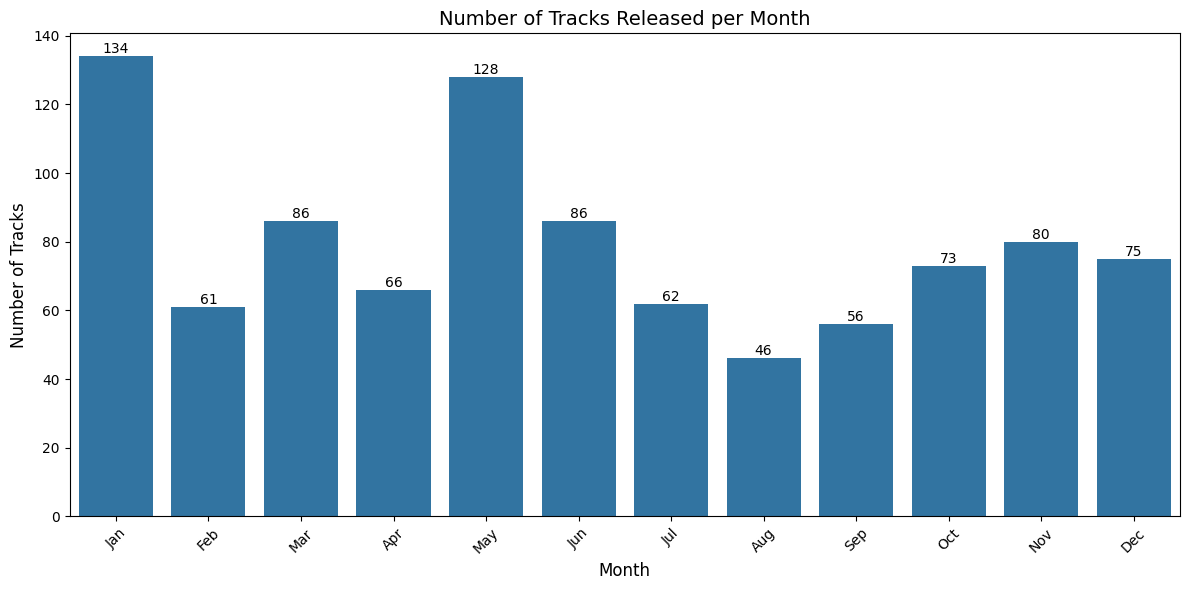

In [60]:
monthly_releases = df['released_month'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_releases.index, y=monthly_releases.values)

# Customize the plot
plt.title('Number of Tracks Released per Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)

# Add month names instead of numbers
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(12), month_names, rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(monthly_releases.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print summary statistics



##### -  The Month with most release is januray averaging from 134 a month

#  Genre and Music Characteristics
#### • Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?
#### •Is there a correlation between deanceability_% and energy_%? How aout valence_% and acousticness_%?



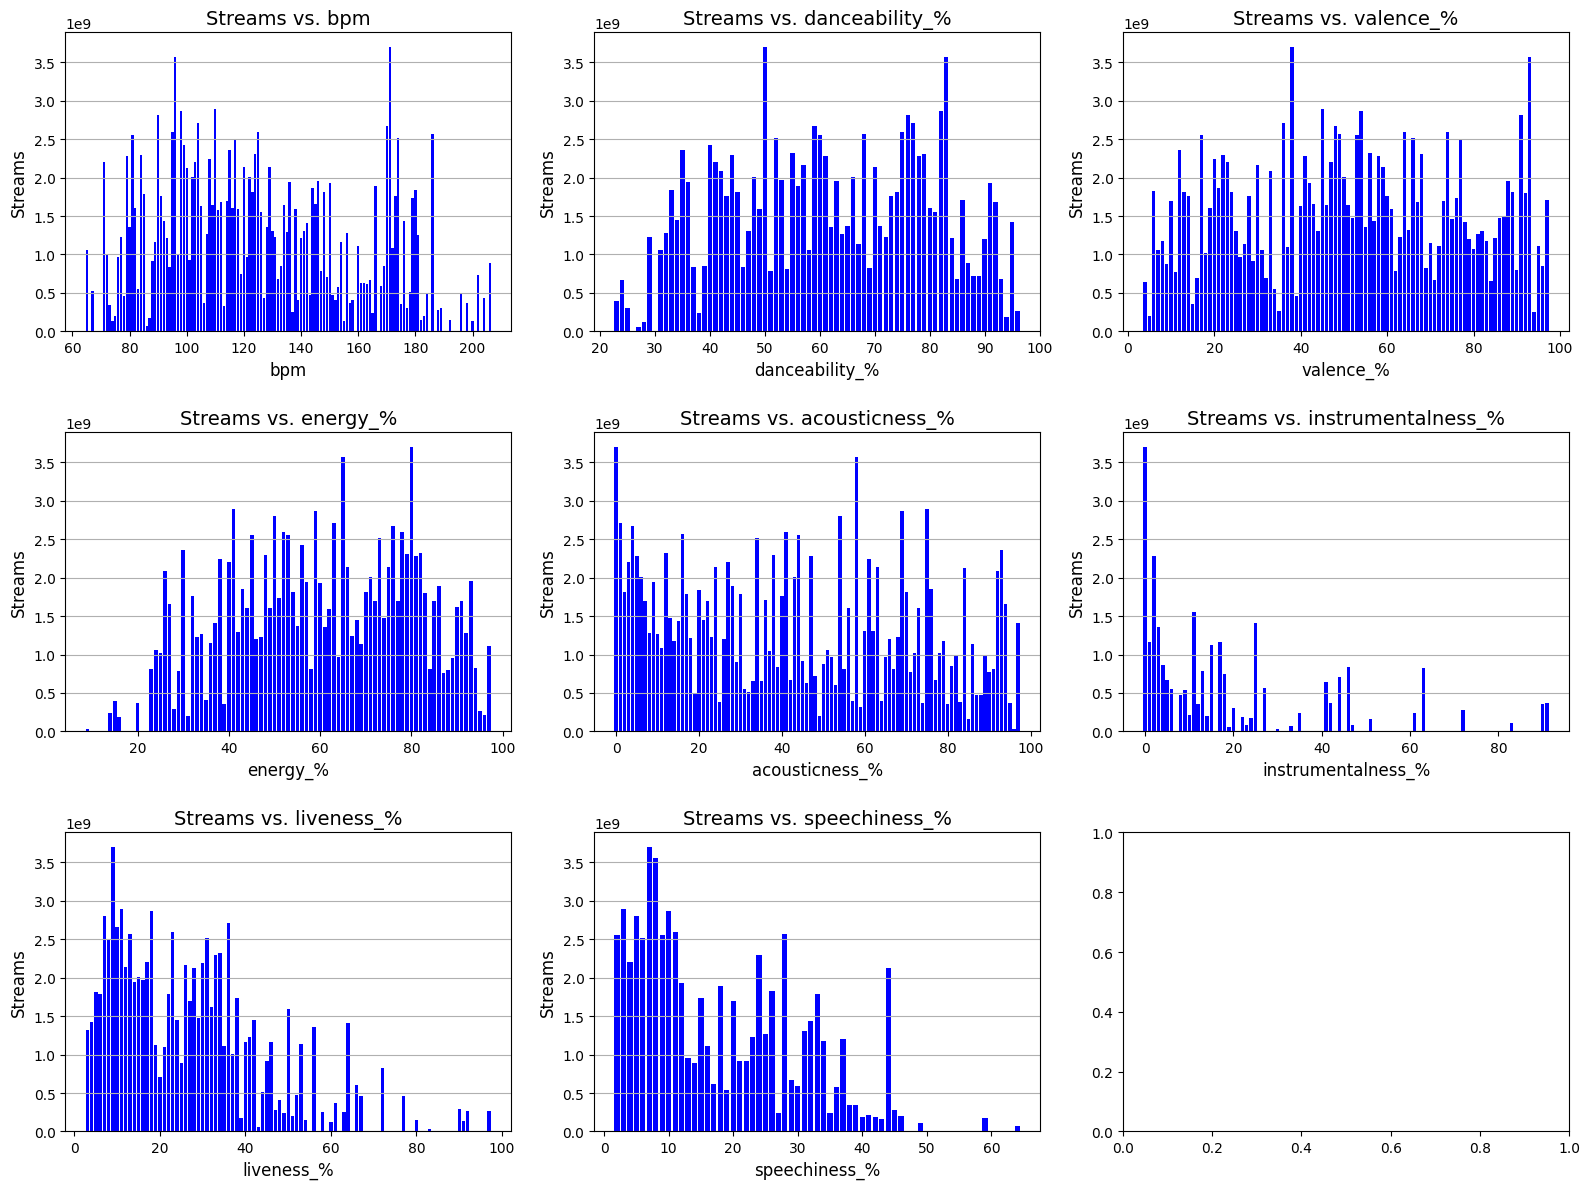

Correlations with Streams:
                     streams
bpm                -0.002438
danceability_%     -0.105457
valence_%          -0.040831
energy_%           -0.026051
acousticness_%     -0.004485
instrumentalness_% -0.044902
liveness_%         -0.048337
speechiness_%      -0.112333


In [17]:
columns_to_plot = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    plt.sca(axes[i])
    plt.bar(df[column], df['streams'], color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(axis='y')
plt.tight_layout()
plt.show()
# Calculate and display specific correlations as DataFrames
correlations = df[columns_to_plot + ['streams']].corr()

# Extract specific correlations with 'streams'
streams_correlations = correlations[['streams']].drop('streams')

# Display the correlations as a DataFrame
print("Correlations with Streams:")
print(streams_correlations)

##### - It appears that energy_% and acousticness_% might be the most influential factors on streams, as energetic, non-acoustic songs tend to attract higher stream counts.

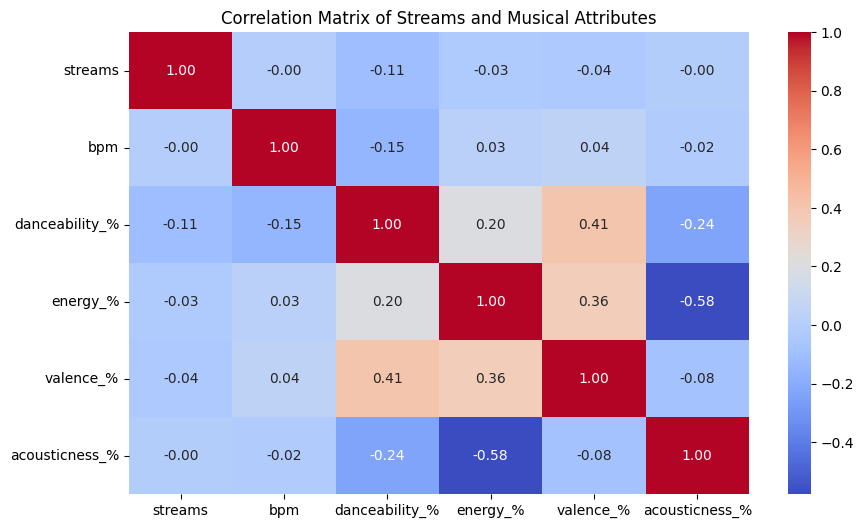

In [73]:
correlation_matrix = df[['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']].corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Streams and Musical Attributes')
plt.show()


# PLATFORM POPULATIRY

#### • How do the number of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?

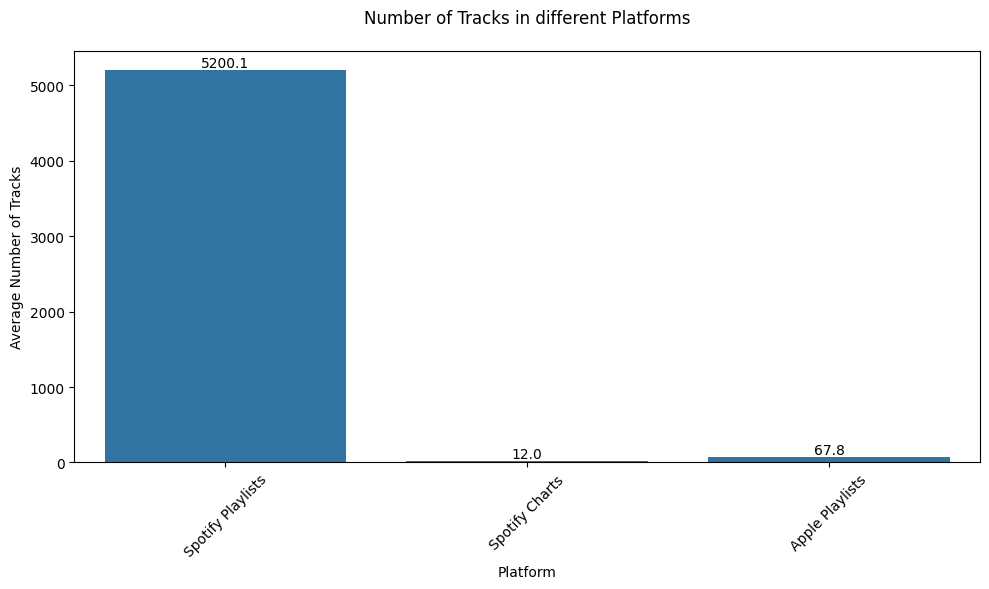


Average Presence by Platform:
Spotify Playlists: 5200.12
Spotify Charts: 12.01
Apple Playlists: 67.81

Platform with highest average presence: Spotify Playlists (5200.12)


In [76]:


# Create a copy of the DataFrame to avoid SettingWithCopyWarning
df_clean = df.copy()

# Convert columns to numeric, replacing any non-numeric values with NaN
df_clean['in_spotify_playlists'] = pd.to_numeric(df_clean['in_spotify_playlists'], errors='coerce')
df_clean['in_spotify_charts'] = pd.to_numeric(df_clean['in_spotify_charts'], errors='coerce')
df_clean['in_apple_playlists'] = pd.to_numeric(df_clean['in_apple_playlists'], errors='coerce')

# Calculate averages
platform_averages = {
    'Spotify Playlists': df_clean['in_spotify_playlists'].mean(),
    'Spotify Charts': df_clean['in_spotify_charts'].mean(),
    'Apple Playlists': df_clean['in_apple_playlists'].mean()
}

# Create the visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=list(platform_averages.keys()), y=list(platform_averages.values()))

# Customize the plot
plt.title('Number of Tracks in different Platforms', pad=20)
plt.xlabel('Platform')
plt.ylabel('Average Number of Tracks')
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(platform_averages.values()):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the results
print("\nAverage Presence by Platform:")
for platform, avg in platform_averages.items():
    print(f"{platform}: {avg:.2f}")

# Find the platform with highest presence
max_platform = max(platform_averages.items(), key=lambda x: x[1])
print(f"\nPlatform with highest average presence: {max_platform[0]} ({max_platform[1]:.2f})")

# ADVANCE ANALYSIS

#### • Based on the streams data, can you indentify any patterns among tracks with the same key or mode(Major vs Minor)?
#### • Do certain genres or artists consistenly appear in more playlists or charts? Perfrom an analysus to compare the most frequently appearing artists in playlist or charts.

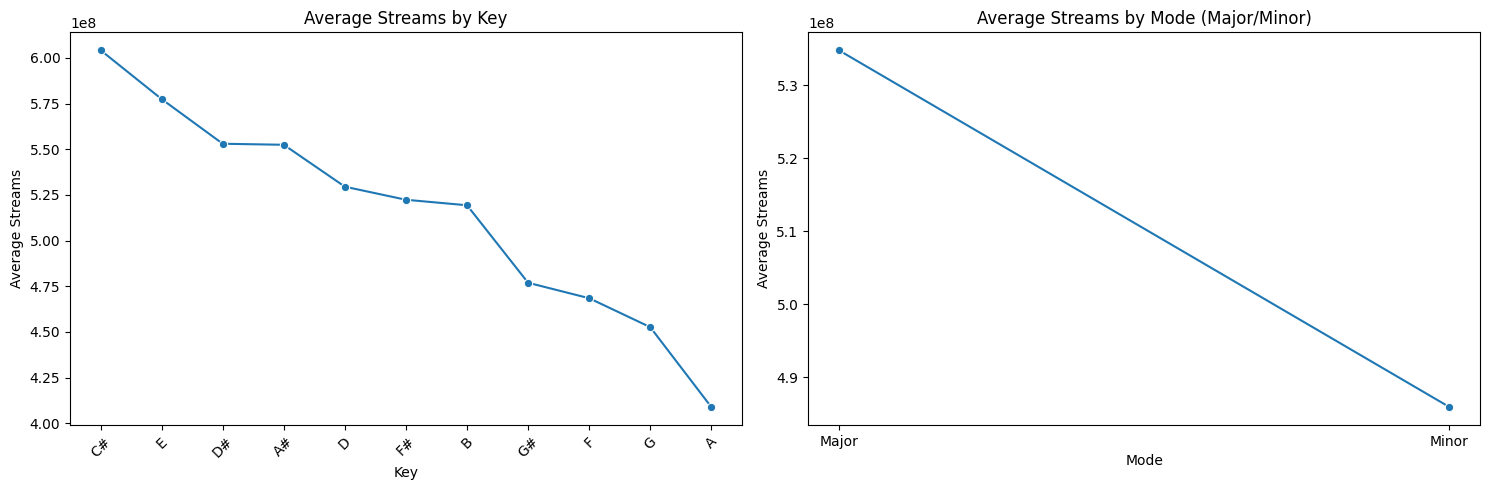

In [21]:
       # Calculate average streams by key and mode
key_streams = df.groupby('key')['streams'].mean().sort_values(ascending=False)
mode_streams = df.groupby('mode')['streams'].mean()
    
    # Plotting
plt.figure(figsize=(15, 5))
    
    # Plot 1: Line plot for Streams by Key
plt.subplot(1, 2, 1)
sns.lineplot(x=key_streams.index, y=key_streams.values, marker="o")
plt.title('Average Streams by Key')
plt.xlabel('Key')
plt.ylabel('Average Streams')
plt.xticks(rotation=45)
    
    # Plot 2: Line plot for Streams by Mode
plt.subplot(1, 2, 2)
sns.lineplot(x=mode_streams.index, y=mode_streams.values, marker="o")
plt.title('Average Streams by Mode (Major/Minor)')
plt.xlabel('Mode')
plt.ylabel('Average Streams')
    
plt.tight_layout()
plt.show()

##### - C# and E have higher average streams than other keys. This suggest that listeners prefers the gernres and qualities that are associated with these keys
##### -  Difference between Major and Minor modes is notable, but not extremely large. This suggests that while there is a preference, it's not overwhelmingly decisive, meaning popular songs can still perform well regardless of being in a Major or Minor key.

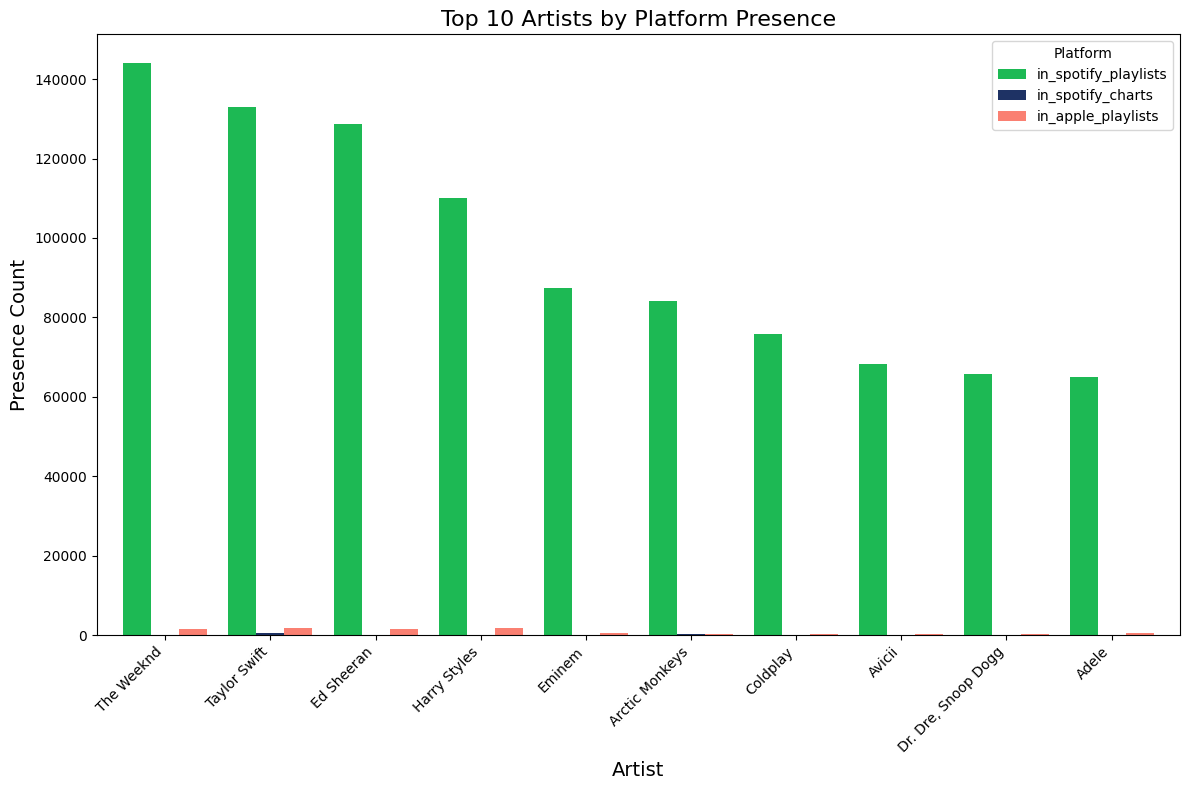

In [22]:
# Calculate artist metrics
artist_metrics = df.groupby('artist(s)_name').agg({
    'in_spotify_playlists': 'sum',
    'in_spotify_charts': 'sum',
    'in_apple_playlists': 'sum',
}).reset_index()

# Calculate total platform presence
artist_metrics['total_presence'] = (
    artist_metrics['in_spotify_playlists'] + 
    artist_metrics['in_spotify_charts'] + 
    artist_metrics['in_apple_playlists']
)

# Get top 10 artists by total presence
top_artists = artist_metrics.nlargest(10, 'total_presence').set_index('artist(s)_name')

# Define colors for each playlist type
colors = ['#1DB954', '#1E3264', '#FA8072']

# Plot side-by-side bar chart
ax = top_artists[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']].plot(
    kind='bar',
    color=colors,
    figsize=(12, 8),
    width=0.8  # Control width of bars for better spacing
)

# Enhance chart labels and style
ax.set_title('Top 10 Artists by Platform Presence', fontsize=16)
ax.set_xlabel('Artist', fontsize=14)
ax.set_ylabel('Presence Count', fontsize=14)
ax.legend(title="Platform", loc="upper right")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


##### -  Most of the listed artists have a significantly higher presence in Spotify playlists compared to Spotify charts and Apple playlists.